In [1]:
from keras.models import load_model
from sklearn import datasets
import pandas as pd
digits = pd.read_csv("car.data", header=None)

Using TensorFlow backend.


In [2]:
print(digits)

          0      1      2     3      4     5      6
0     vhigh  vhigh      2     2  small   low  unacc
1     vhigh  vhigh      2     2  small   med  unacc
2     vhigh  vhigh      2     2  small  high  unacc
3     vhigh  vhigh      2     2    med   low  unacc
4     vhigh  vhigh      2     2    med   med  unacc
...     ...    ...    ...   ...    ...   ...    ...
1723    low    low  5more  more    med   med   good
1724    low    low  5more  more    med  high  vgood
1725    low    low  5more  more    big   low  unacc
1726    low    low  5more  more    big   med   good
1727    low    low  5more  more    big  high  vgood

[1728 rows x 7 columns]


In [3]:
digit = digits.replace({ 'vhigh' : 1, 'high' : 2, 'med' : 3, 'low' : 4, 'more' : 6, 'small' : 7, 'big' : 8,'5more' : 9, 'unacc' : 0, 'acc' : 1, 'good' : 2, 'vgood' : 3 })

In [4]:
print(digit)

      0  1  2  3  4  5  6
0     1  1  2  2  7  4  0
1     1  1  2  2  7  3  0
2     1  1  2  2  7  2  0
3     1  1  2  2  3  4  0
4     1  1  2  2  3  3  0
...  .. .. .. .. .. .. ..
1723  4  4  9  6  3  3  2
1724  4  4  9  6  3  2  3
1725  4  4  9  6  8  4  0
1726  4  4  9  6  8  3  2
1727  4  4  9  6  8  2  3

[1728 rows x 7 columns]


In [5]:
digit.rename(columns = {6:'label'}, inplace=True)

In [6]:
print(digit)

      0  1  2  3  4  5  label
0     1  1  2  2  7  4      0
1     1  1  2  2  7  3      0
2     1  1  2  2  7  2      0
3     1  1  2  2  3  4      0
4     1  1  2  2  3  3      0
...  .. .. .. .. .. ..    ...
1723  4  4  9  6  3  3      2
1724  4  4  9  6  3  2      3
1725  4  4  9  6  8  4      0
1726  4  4  9  6  8  3      2
1727  4  4  9  6  8  2      3

[1728 rows x 7 columns]


In [7]:
print(digit[['label']])

      label
0         0
1         0
2         0
3         0
4         0
...     ...
1723      2
1724      3
1725      0
1726      2
1727      3

[1728 rows x 1 columns]


In [8]:
from numpy.random import RandomState

rng = RandomState()

train = digit.sample(frac=0.7, random_state=rng)
test = digit.loc[~digit.index.isin(train.index)]

In [9]:
print(train)
print(train[['label']])

      0  1  2  3  4  5  label
1100  3  3  2  6  7  2      0
1276  3  4  9  2  8  3      0
1543  4  3  3  2  3  3      0
941   3  1  4  6  3  2      1
745   2  3  9  4  8  3      1
...  .. .. .. .. .. ..    ...
589   2  2  3  6  3  3      1
751   2  3  9  6  3  3      1
1459  4  2  4  2  7  3      0
760   2  4  2  2  3  3      0
1373  4  1  4  6  3  2      1

[1210 rows x 7 columns]
      label
1100      0
1276      0
1543      0
941       1
745       1
...     ...
589       1
751       1
1459      0
760       0
1373      1

[1210 rows x 1 columns]


In [10]:
print(test)

      0  1  2  3  4  5  label
0     1  1  2  2  7  4      0
2     1  1  2  2  7  2      0
5     1  1  2  2  3  2      0
6     1  1  2  2  8  4      0
10    1  1  2  4  7  3      0
...  .. .. .. .. .. ..    ...
1720  4  4  9  6  7  3      1
1721  4  4  9  6  7  2      2
1722  4  4  9  6  3  4      0
1723  4  4  9  6  3  3      2
1726  4  4  9  6  8  3      2

[518 rows x 7 columns]


In [11]:
train_label = train.iloc[:,-1]
test_label = test.iloc[:,-1]

In [12]:
train = train.drop(['label'], axis=1)
test = test.drop(['label'], axis=1)

In [13]:
print(train)

      0  1  2  3  4  5
1100  3  3  2  6  7  2
1276  3  4  9  2  8  3
1543  4  3  3  2  3  3
941   3  1  4  6  3  2
745   2  3  9  4  8  3
...  .. .. .. .. .. ..
589   2  2  3  6  3  3
751   2  3  9  6  3  3
1459  4  2  4  2  7  3
760   2  4  2  2  3  3
1373  4  1  4  6  3  2

[1210 rows x 6 columns]


In [14]:
print(test)

      0  1  2  3  4  5
0     1  1  2  2  7  4
2     1  1  2  2  7  2
5     1  1  2  2  3  2
6     1  1  2  2  8  4
10    1  1  2  4  7  3
...  .. .. .. .. .. ..
1720  4  4  9  6  7  3
1721  4  4  9  6  7  2
1722  4  4  9  6  3  4
1723  4  4  9  6  3  3
1726  4  4  9  6  8  3

[518 rows x 6 columns]


In [15]:
print(train_label)
print(test_label)

1100    0
1276    0
1543    0
941     1
745     1
       ..
589     1
751     1
1459    0
760     0
1373    1
Name: label, Length: 1210, dtype: int64
0       0
2       0
5       0
6       0
10      0
       ..
1720    1
1721    2
1722    0
1723    2
1726    2
Name: label, Length: 518, dtype: int64


In [16]:
from keras.utils import to_categorical
Y_train = to_categorical(train_label,4)
Y_test = to_categorical(test_label,4)

In [17]:
x_val = train[:1000]
partial_x_train = train[1000:]
y_val = Y_train[:1000]
partial_y_train = Y_train[1000:]

In [18]:
print(partial_x_train.shape)

(210, 6)


In [19]:
from keras import models
from keras import layers
from keras import optimizers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(512,activation = 'relu',input_shape = (6,)))
    model.add(layers.Dropout(0.15))
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dropout(0.15))
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dropout(0.15))
    model.add(layers.Dense(4,activation='softmax'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [29]:
model = build_model()
history = model.fit(partial_x_train,partial_y_train,epochs = 150,batch_size = 512, validation_data = (x_val,y_val))
#model.save("file1.h5")

Train on 210 samples, validate on 1000 samples
Epoch 1/150
210/210 [==============================] - 0s 774us/step - loss: 0.6085 - accuracy: 0.7464 - val_loss: 0.3898 - val_accuracy: 0.8430
Epoch 2/150
210/210 [==============================] - 0s 85us/step - loss: 0.4098 - accuracy: 0.8298 - val_loss: 0.3676 - val_accuracy: 0.8500
Epoch 3/150
210/210 [==============================] - 0s 90us/step - loss: 0.3875 - accuracy: 0.8333 - val_loss: 0.3684 - val_accuracy: 0.8593
Epoch 4/150
210/210 [==============================] - 0s 85us/step - loss: 0.3694 - accuracy: 0.8512 - val_loss: 0.3741 - val_accuracy: 0.8540
Epoch 5/150
210/210 [==============================] - 0s 85us/step - loss: 0.3762 - accuracy: 0.8512 - val_loss: 0.3496 - val_accuracy: 0.8600
Epoch 6/150
210/210 [==============================] - 0s 81us/step - loss: 0.3690 - accuracy: 0.8393 - val_loss: 0.3386 - val_accuracy: 0.8655
Epoch 7/150
210/210 [==============================] - 0s 90us/step - loss: 0.3532 - acc

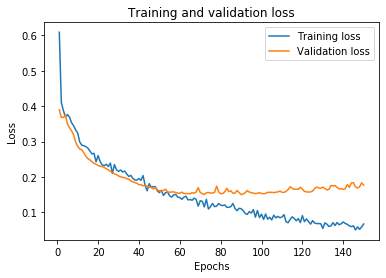

In [30]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
##### var = load_model("file.h5")
#result =var.evaluate(test,test_label)
result =model.evaluate(test,Y_test)
print(result)

518/518 [==============================] - 0s 27us/step
[0.21079988462641894, 0.9324324131011963]
